In [ ]:
from google.colab import files
uploaded=files.upload()


Saving imdb_top_1000.csv to imdb_top_1000 (1).csv


In [ ]:
df.to_csv("finalclean_imbd",index=False)

In [ ]:
import pandas as pd
df=pd.read_csv('imdb_top_1000.csv')
df.head(5)


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [ ]:
df.isnull().sum


<bound method DataFrame.sum of      Poster_Link  Series_Title  Released_Year  Certificate  Runtime  Genre  \
0          False         False          False        False    False  False   
1          False         False          False        False    False  False   
2          False         False          False        False    False  False   
3          False         False          False        False    False  False   
4          False         False          False        False    False  False   
..           ...           ...            ...          ...      ...    ...   
995        False         False          False        False    False  False   
996        False         False          False        False    False  False   
997        False         False          False        False    False  False   
998        False         False          False         True    False  False   
999        False         False          False         True    False  False   

     IMDB_Rating  Overview  Meta_score  Director  Star1  Star2  Star3  Star4  \
0          False     False       False     False  False  False  False  False   
1          False     False       False     False  False  False  False  False   
2          False     False       False     False  False  False  False  False   
3          False     False       False     False  False  False  False  False   
4          False     False       False     False  False  False  False  False   
..           ...       ...         ...       ...    ...    ...    ...    ...   
995        False     False       False     False  False  False  False  False   
996        False     False       False     False  False  False  False  False   
997        False     False       False     False  False  False  False  False   
998        False     False       False     False  False  False  False  False   
999        False     False       False     False  False  False  False  False   

     No_of_Votes  Gross  
0          False  False  
1          False  False  
2          False  False  
3          False  False  
4          False  False  
..           ...    ...  
995        False   True  
996        False   True  
997        False  False  
998        False   True  
999        False   True  

[1000 rows x 16 columns]>

In [ ]:
unknown=df['Certificate'].mode()[0]
df['Certificate'].fillna(unknown,inplace=True)


/tmp/ipython-input-3743280435.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Certificate'].fillna(unknown,inplace=True)


In [ ]:
df['Meta_score'].fillna(df['Meta_score'].mean(),inplace=True)

/tmp/ipython-input-3713988665.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Meta_score'].fillna(df['Meta_score'].mean(),inplace=True)


In [ ]:
duplicate=df.duplicated().sum()
print(f"number of duplicate rows:{duplicate}")

number of duplicate rows:0


In [ ]:
print("data types before conversion:")
print(df.dtypes)

data types before conversion:
Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object


In [ ]:
df['Released_Year']=pd.to_numeric(df['Released_Year'],errors='coerce')

In [ ]:
print("missing vaku after conversion'released_year'")
print(df['Released_Year'].isnull().sum())

missing vaku after conversion'released_year'
1


In [ ]:
df=df.dropna(subset=['Released_Year'])

In [ ]:
df['Released_Year']=df['Released_Year'].round().astype('int')

In [ ]:
df['Released_Year']=df['Released_Year'].astype(str)

In [ ]:
df=df[df['Released_Year'].str.isnumeric()]

In [ ]:
print(df['Released_Year'].dtypes)

object


In [ ]:
df.isnull().sum()

,0
Poster_Link,0
Series_Title,0
Released_Year,0
Certificate,0
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,0
Director,0


In [ ]:
df['Gross']=pd.to_numeric(df['Gross'],errors='coerce')

In [ ]:
df['Gross'].fillna(df['Gross'].mean(),inplace=True)

/tmp/ipython-input-3257575296.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gross'].fillna(df['Gross'].mean(),inplace=True)


In [ ]:
missing_value_summery=df.isnull().sum()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("imdb_top_1000.csv")
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [ ]:
df=df.replace("min","",regex=True)

In [ ]:
df["Runtime"]=df["Runtime"].astype(str).str.replace("min","",regex=False)
df['Runtime']=pd.to_numeric(df["Runtime"],errors="coerce")

In [ ]:
df.head(5)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
if"Gross"in df.columns:
  df["Gross"]=df["Gross"].astype(str).str.replace("[^0-9.]","",regex=True)
  df["Gross"]=pd.to_numeric(df["Gross"],errors="coerce")

In [ ]:
if "No_of_Votes" in df.columns:
    df["No_of_Votes"] = pd.to_numeric(df["No_of_Votes"], errors="coerce")


In [ ]:
if "Released_Year" in df.columns:
    df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce")


In [ ]:
text_colums=["Genre","Director","Star1","Star2","Star3","Star4"]
for col in text_colums:
  df[col]=df[col].astype(str).str.strip()

In [ ]:
df.to_csv("cleaned_data.csv",index=False)

In [ ]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   int64  
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    float64
dtypes: float64(3), int64(2), object(11)
memory usage: 125.1+ KB
None
                                

In [ ]:
print("Shape of dataset",df.shape)
print("\n columns names",df.columns.tolist())
print("summary statistics:\n",df.describe(include="all"))

Shape of dataset (1000, 16)

 columns names ['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross']
summary statistics:
                                               Poster_Link Series_Title  \
count                                                1000         1000   
unique                                               1000          999   
top     https://m.media-amazon.com/images/M/MV5BMTY5OD...     Drishyam   
freq                                                    1            2   
mean                                                  NaN          NaN   
std                                                   NaN          NaN   
min                                                   NaN          NaN   
25%                                                   NaN          NaN   
50%                                                   NaN          NaN  

In [ ]:
df["Gross"] = df["Gross"].astype(str).str.replace(",", "", regex=False)
df["Gross"] = pd.to_numeric(df["Gross"], errors="coerce")

df["Runtime"] = df["Runtime"].astype(str).str.replace("min", "", regex=False)
df["Runtime"] = df["Runtime"].str.strip()
df["Runtime"] = pd.to_numeric(df["Runtime"], errors="coerce")


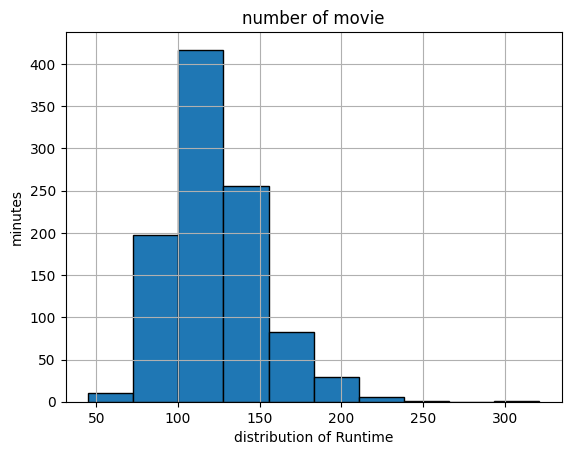

In [ ]:
import matplotlib.pyplot as plt
df["Runtime"].hist(bins=10,edgecolor="black")
plt.xlabel("distribution of Runtime")
plt.ylabel("minutes")
plt.title("number of movie")
plt.show()

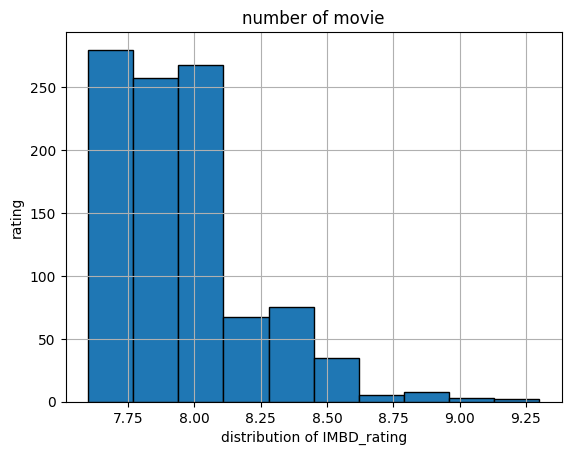

In [ ]:
import matplotlib.pyplot as plt
df["IMDB_Rating"].hist(bins=10,edgecolor="black")
plt.xlabel("distribution of IMBD_rating")
plt.ylabel("rating")
plt.title("number of movie")
plt.show()




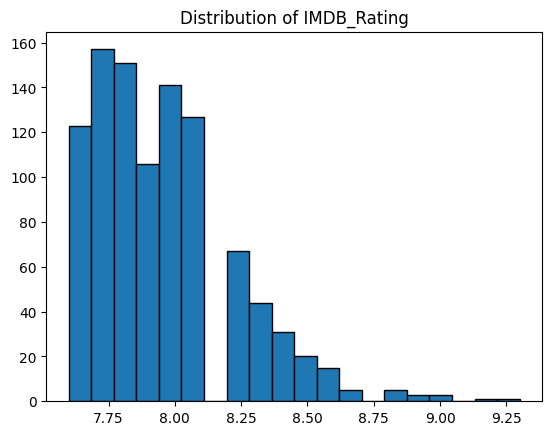

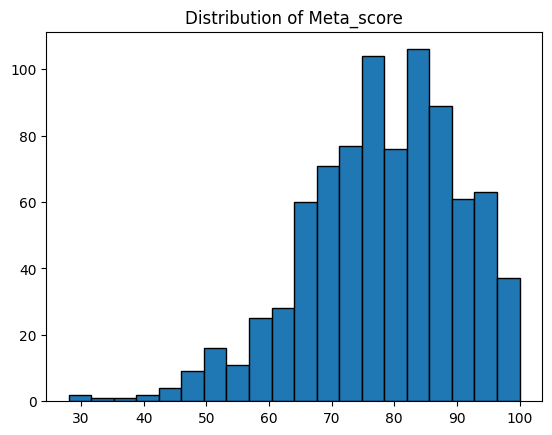

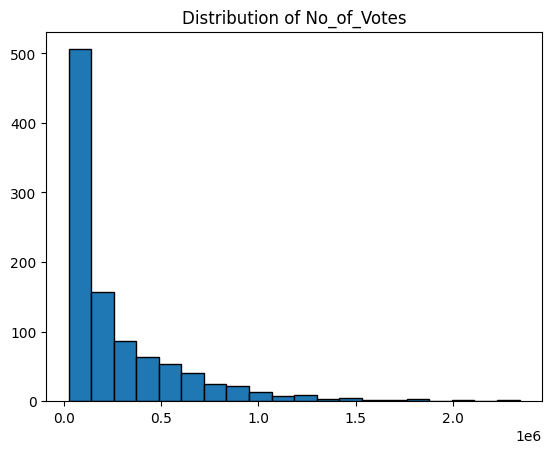

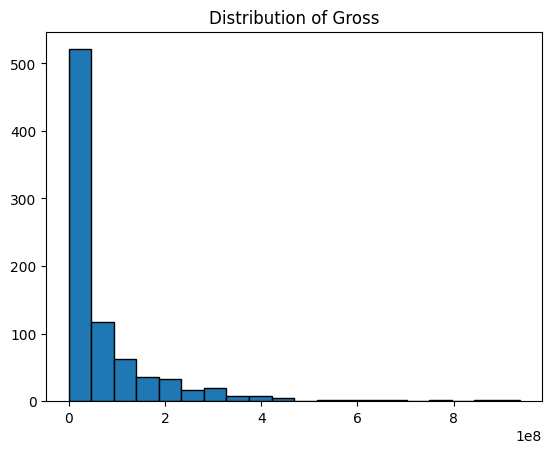

In [ ]:
cols = ["IMDB_Rating", "Meta_score", "No_of_Votes", "Gross"]
for c in cols:
    plt.hist(df[c].dropna(), bins=20, edgecolor="black")
    plt.title(f"Distribution of {c}")
    plt.show()

# New Section

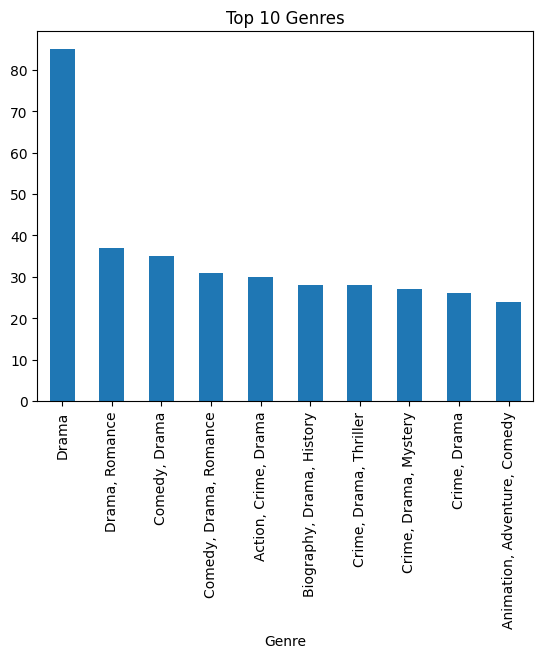

In [ ]:
df['Genre'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Genres")
plt.show()


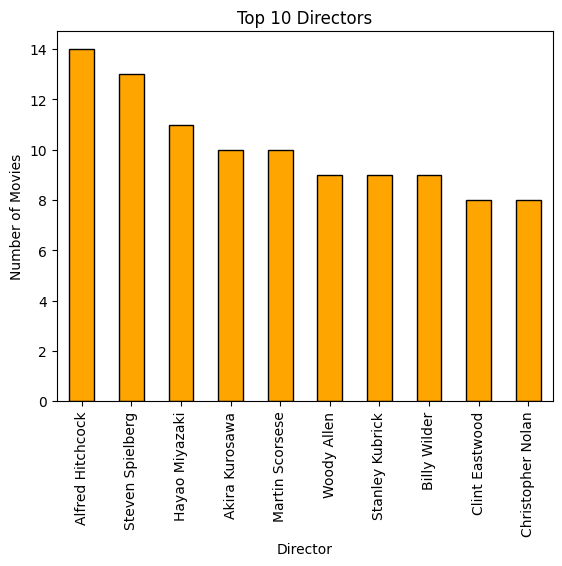

In [ ]:
df['Director'].value_counts().head(10).plot(kind='bar', color='orange', edgecolor='black')
plt.title("Top 10 Directors")
plt.xlabel("Director")
plt.ylabel("Number of Movies")
plt.show()

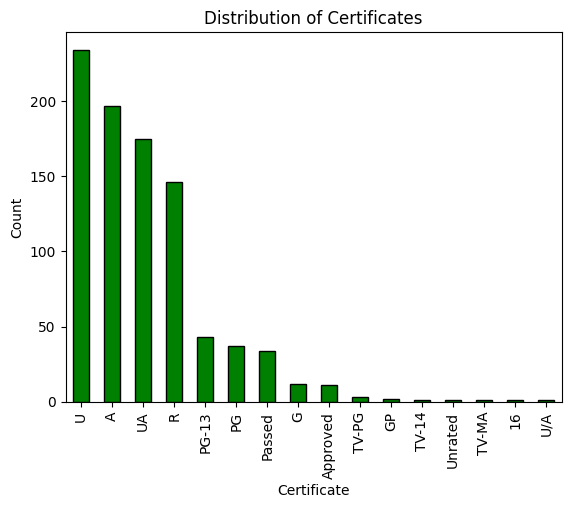

In [ ]:
df['Certificate'].value_counts().plot(kind='bar', color='green', edgecolor='black')
plt.title("Distribution of Certificates")
plt.xlabel("Certificate")
plt.ylabel("Count")
plt.show()

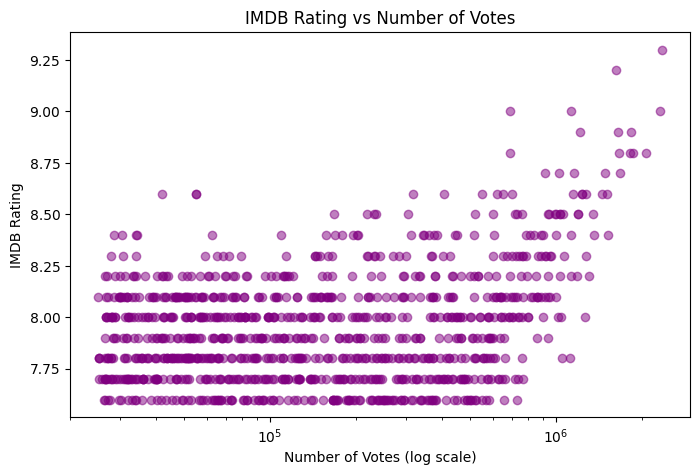

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(df['No_of_Votes'], df['IMDB_Rating'], alpha=0.5, color='purple')
plt.xscale('log')   # votes are very large, log scale makes it clearer
plt.title("IMDB Rating vs Number of Votes")
plt.xlabel("Number of Votes (log scale)")
plt.ylabel("IMDB Rating")
plt.show()


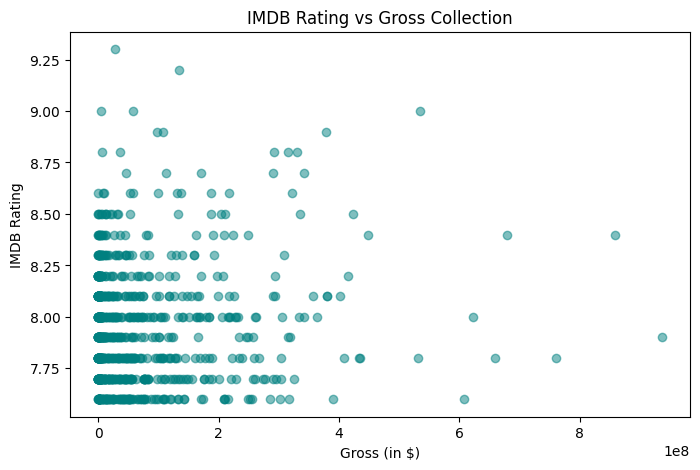

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(df['Gross'], df['IMDB_Rating'], alpha=0.5, color='teal')
plt.title("IMDB Rating vs Gross Collection")
plt.xlabel("Gross (in $)")
plt.ylabel("IMDB Rating")
plt.show()


/tmp/ipython-input-3707975558.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Genre'].isin(top_genres)], x="Genre", y="IMDB_Rating", palette="Set2")


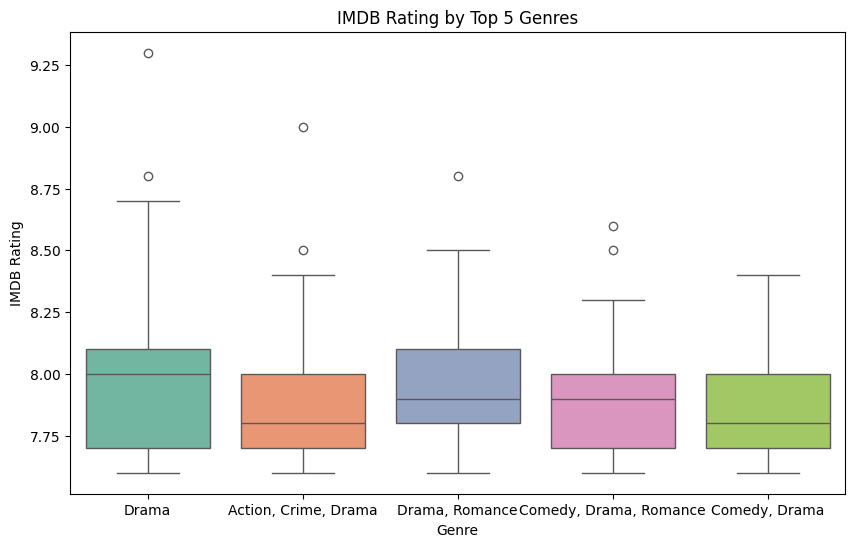

In [ ]:
top_genres = df['Genre'].value_counts().head(5).index
plt.figure(figsize=(10,6))
sns.boxplot(data=df[df['Genre'].isin(top_genres)], x="Genre", y="IMDB_Rating", palette="Set2")
plt.title("IMDB Rating by Top 5 Genres")
plt.xlabel("Genre")
plt.ylabel("IMDB Rating")
plt.show()


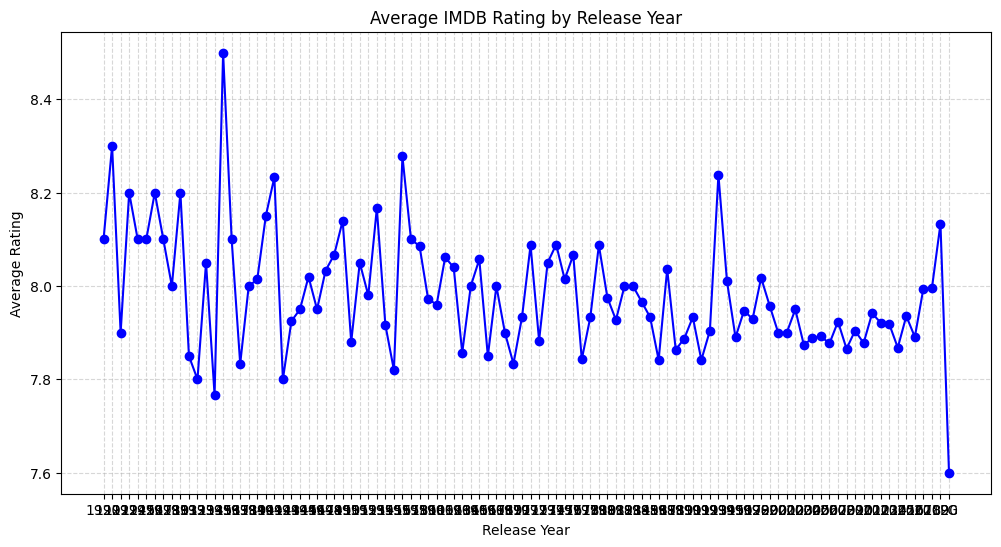

In [ ]:
yearly_rating = df.groupby('Released_Year')['IMDB_Rating'].mean()

plt.figure(figsize=(12,6))
plt.plot(yearly_rating.index, yearly_rating.values, marker='o', color='blue')
plt.title("Average IMDB Rating by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Average Rating")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [ ]:
df['Primary_Genre'] = df['Genre'].str.split(',').str[0].str.strip()


In [ ]:
df['Runtime_Category'] = pd.cut(df['Runtime'],
                                bins=[0,90,150,300],
                                labels=['Short (<90m)','Medium (90-150m)','Long (>150m)'])


In [ ]:
df['Gross_Category'] = pd.qcut(df['Gross'], q=3, labels=['Low','Medium','High'])


In [ ]:
df.to_csv("imdb_enhanced.csv", index=False)
print("Enhanced dataset saved as imdb_enhanced.csv")


Enhanced dataset saved as imdb_enhanced.csv


In [ ]:
print(df.columns.tolist())


['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross', 'Primary_Genre', 'Runtime_Category', 'Gross_Category']


In [ ]:

df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

df['Decade'] = (df['Released_Year'] // 10 * 10).astype('Int64').astype(str) + "s"


print(df[['Released_Year','Decade']].head(10))


   Released_Year Decade
0         1994.0  1990s
1         1972.0  1970s
2         2008.0  2000s
3         1974.0  1970s
4         1957.0  1950s
5         2003.0  2000s
6         1994.0  1990s
7         1993.0  1990s
8         2010.0  2010s
9         1999.0  1990s


Primary_Genre
Western      8.350000
Crime        8.016822
Fantasy      8.000000
Mystery      7.975000
Film-Noir    7.966667
Drama        7.957439
Action       7.949419
Biography    7.938636
Adventure    7.937500
Animation    7.930488
Name: IMDB_Rating, dtype: float64


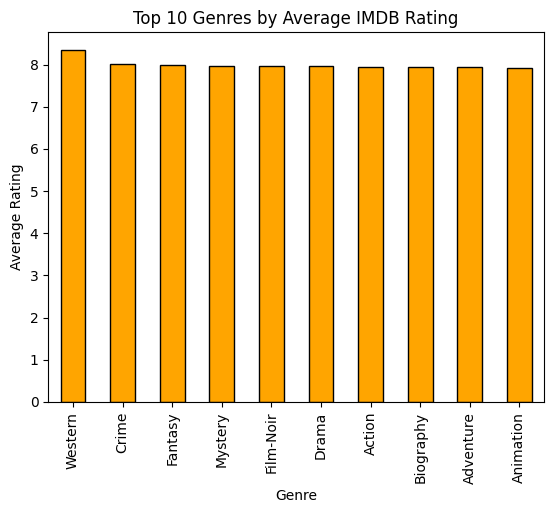

In [ ]:
genre_ratings = df.groupby('Primary_Genre')['IMDB_Rating'].mean().sort_values(ascending=False)
print(genre_ratings.head(10))

genre_ratings.head(10).plot(kind='bar', color='orange', edgecolor='black')
plt.title("Top 10 Genres by Average IMDB Rating")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.show()


Primary_Genre
Western      8.350000
Crime        8.016822
Fantasy      8.000000
Mystery      7.975000
Film-Noir    7.966667
Drama        7.957439
Action       7.949419
Biography    7.938636
Adventure    7.937500
Animation    7.930488
Name: IMDB_Rating, dtype: float64


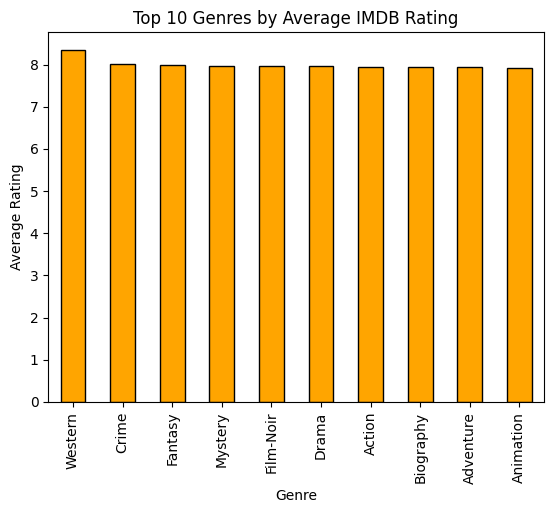

In [ ]:
genre_ratings = df.groupby('Primary_Genre')['IMDB_Rating'].mean().sort_values(ascending=False)
print(genre_ratings.head(10))

genre_ratings.head(10).plot(kind='bar', color='orange', edgecolor='black')
plt.title("Top 10 Genres by Average IMDB Rating")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.show()


/tmp/ipython-input-9148039.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Runtime_Category')['IMDB_Rating'].mean().plot(kind='bar', color='green', edgecolor='black')


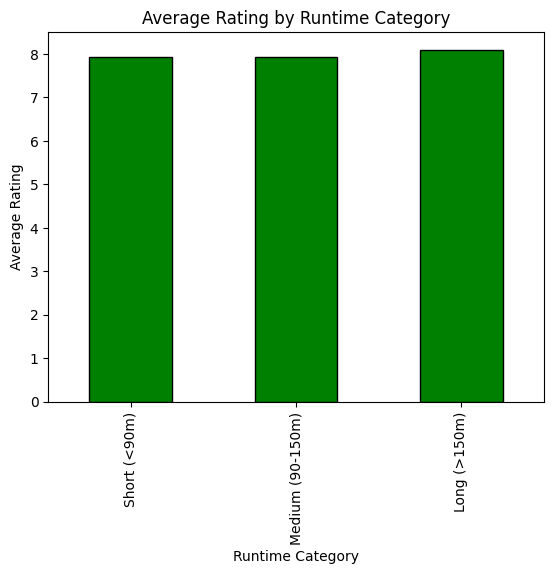

In [ ]:
df.groupby('Runtime_Category')['IMDB_Rating'].mean().plot(kind='bar', color='green', edgecolor='black')
plt.title("Average Rating by Runtime Category")
plt.xlabel("Runtime Category")
plt.ylabel("Average Rating")
plt.show()


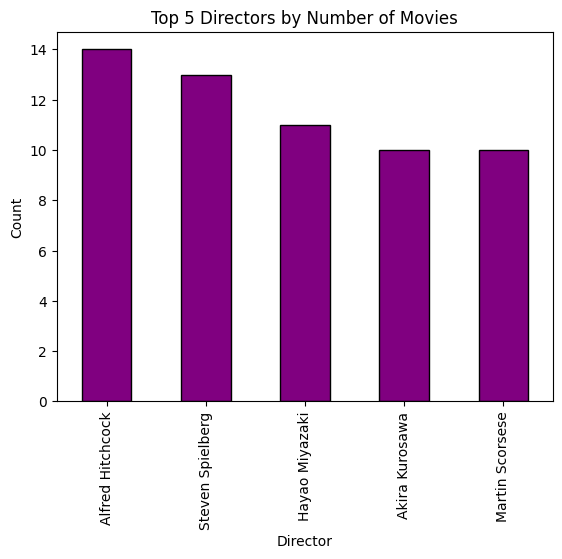

In [ ]:
df['Director'].value_counts().head(5).plot(kind='bar', color='purple', edgecolor='black')
plt.title("Top 5 Directors by Number of Movies")
plt.xlabel("Director")
plt.ylabel("Count")
plt.show()


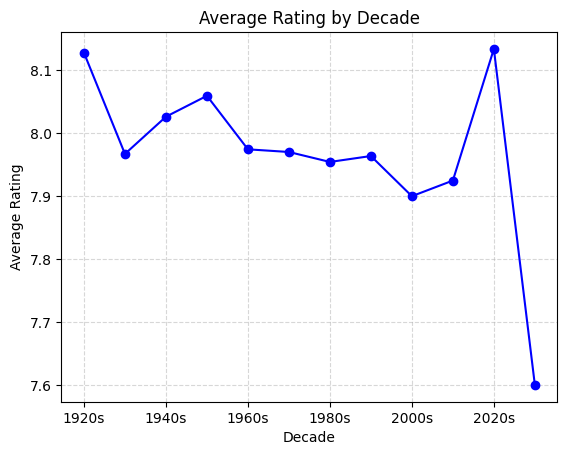

In [ ]:
decade_avg = df.groupby('Decade')['IMDB_Rating'].mean()
decade_avg.plot(kind='line', marker='o', color='blue')
plt.title("Average Rating by Decade")
plt.xlabel("Decade")
plt.ylabel("Average Rating")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [ ]:
df.to_csv("cleaned_imdb.csv")

In [ ]:
from google.colab import files
files.download("cleaned_imdb.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

df = pd.read_csv("cleaned_imdb.csv")

print("Columns:", df.columns.tolist())

# Check first 5 rows
print(df.head())


print(df.dtypes)


print(df.isnull().sum())


Columns: ['Unnamed: 0', 'Poster_Link', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross', 'Primary_Genre', 'Runtime_Category', 'Gross_Category', 'Decade']
   Unnamed: 0                                        Poster_Link  \
0           0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1           1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2           2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3           3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4           4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title  Released_Year Certificate  Runtime  \
0  The Shawshank Redemption         1994.0           A      142   
1             The Godfather         1972.0           A      175   
2           The Dark Knight         2008.0          UA      152   
3    The Godfather: Part II         19

In [ ]:
import pandas as pd


df = pd.read_csv("cleaned_imdb.csv")


df = df.drop(columns=["Poster_Link", "Overview"], errors="ignore")

df['Released_Year'] = df['Released_Year'].fillna(0).astype(int)
df['Runtime'] = df['Runtime'].fillna(0).astype(int)
df['IMDB_Rating'] = df['IMDB_Rating'].fillna(0).astype(float)
df['Meta_score'] = df['Meta_score'].fillna(0).astype(int)
df['No_of_Votes'] = df['No_of_Votes'].fillna(0).astype(int)
df['Gross'] = df['Gross'].fillna(0).astype(float)
for col in ['Series_Title', 'Certificate', 'Genre', 'Director',
            'Star1', 'Star2', 'Star3', 'Star4',
            'Primary_Genre', 'Runtime_Category', 'Gross_Category', 'Decade']:
    df[col] = df[col].fillna("Unknown")


df.columns = [col.capitalize() for col in df.columns]

df.to_csv("cleaned_imdb_fixed.csv", index=False)





<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

df = pd.read_csv("cleaned_imdb_fixed.csv")
df = df.drop(columns=["Unnamed: 0"])
df.to_csv("imdb_ready.csv", index=False)


In [ ]:
print(df.isnull().sum())

Unnamed: 0          0
Series_title        0
Released_year       0
Certificate         0
Runtime             0
Genre               0
Imdb_rating         0
Meta_score          0
Director            0
Star1               0
Star2               0
Star3               0
Star4               0
No_of_votes         0
Gross               0
Primary_genre       0
Runtime_category    0
Gross_category      0
Decade              0
dtype: int64


In [ ]:
from google.colab import files
files.download("imdb_ready.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>